# Run the PROPER models for comparisons.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import Circle
import numpy as np
import astropy.io.fits as fits 
import astropy.units as u
import time

import proper
import poppy

import wfirst_phaseb_proper
wfirst_phaseb_proper.set_data_dir()
# wfirst_phaseb_proper.copy_here()
# wfirst_phaseb_proper.copy_examples_here()

from importlib import reload
import misc
reload(misc)

<module 'misc' from '/home/u21/kianmilani/Documents/webbpsf-mydev/misc.py'>

Lambda = 7.0000E-07   Throughput = 1.00
Applying lens
Propagating to secondary
Applying lens
Propagating to FOLD_1
Propagating to M3
Applying lens
Propagating to M4
Applying lens
Propagating to M5
Applying lens
Propagating to FOLD_2
Propagating to FSM
Propagating to OAP1
Applying lens
Propagating to FOCM
Propagating to OAP2
Applying lens
Propagating to DM1
Propagating to DM2
Propagating to OAP3
Applying lens
Propagating to FOLD_3
Propagating to OAP4
Applying lens
Propagating to PUPIL_MASK
Propagating to OAP5
Applying lens
Propagating to FPM
Propagating to OAP6
Applying lens
Propagating to LYOT_STOP
Propagating to OAP7
Applying lens
Propagating to FIELD_STOP
Propagating to OAP8
Applying lens
Propagating to filter
Propagating to LENS
Applying lens
Propagating to FOLD_4
Propagating to IMAGE
Total elapsed time (seconds) =  74.3195
PROPER calculation completed in 74.5978s


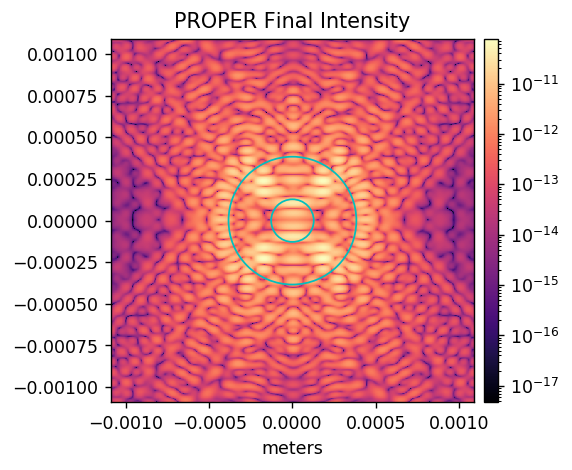

spc730-fresnel-wavefronts/wf_psf_700nm_proper.fits


In [12]:
nlam = 1
lam_array = np.array([0.700])
n = 512                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

xoffset = 0
use_fpm = 1

use_errors = 0
if use_errors==0:
    use_dm1 = 0
    use_dm2 = 0
    polaxis = 0
else:
    use_dm1 = 1
    use_dm2 = 1
    polaxis = 10

dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-spec_long_with_aberrations_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-spec_long_with_aberrations_dm2.fits' )

start = time.time()
(wfs, wfs_sampling_m) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'spc-spec_long',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':xoffset,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'polaxis':polaxis,
                                                           'data_dir':'/groups/douglase/phaseb_data'} )
print('PROPER calculation completed in {:.4f}s'.format(time.time()-start))

psf_wf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 3/final_sampling*psf_sampling_m.value # inner and outer working angles in units of m
outwa = 9/final_sampling*psf_sampling_m.value
patches = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
           Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
misc.myimshow(np.abs(psf_wf)**2,
              'PROPER Final Intensity',
              pxscl=psf_sampling_m,
              lognorm=True,
              patches=patches)

wf = np.zeros(shape=(2,n,n))
wf[0,:,:] = np.abs(wfs[0])**2
wf[1,:,:] = np.angle(wfs[0])

wf_fpath = 'spc730-fresnel-wavefronts/wf_'
if use_errors==1: wf_fpath += 'ab_'
wf_fpath += 'psf_'
if use_fpm==0: wf_fpath += 'nofpm_'
if xoffset!=0: wf_fpath += 'offax_'
if lam_array[0]==0.700: wf_fpath += '700nm_'
wf_fpath += 'proper.fits'
print(wf_fpath)

hdr = fits.Header()
hdr['PIXELSCL'] = psf_sampling_m.value
hdr['PIXSCLLD'] = final_sampling

wf_hdu = fits.PrimaryHDU(wf, header=hdr)
wf_hdu.writeto(wf_fpath, overwrite=True)

Lambda = 8.2500E-07   Throughput = 1.00
Applying lens
Propagating to secondary
Applying lens
Propagating to FOLD_1
Propagating to M3
Applying lens
Propagating to M4
Applying lens
Propagating to M5
Applying lens
Propagating to FOLD_2
Propagating to FSM
Propagating to OAP1
Applying lens
Propagating to FOCM
Propagating to OAP2
Applying lens
Propagating to DM1
Propagating to DM2
Propagating to OAP3
Applying lens
Propagating to FOLD_3
Propagating to OAP4
Applying lens
Propagating to PUPIL_MASK
Propagating to OAP5
Applying lens
Propagating to FPM
Propagating to OAP6
Applying lens
Propagating to LYOT_STOP
Propagating to OAP7
Applying lens
Propagating to FIELD_STOP
Propagating to OAP8
Applying lens
Propagating to filter
Propagating to LENS
Applying lens
Propagating to FOLD_4
Propagating to IMAGE
Total elapsed time (seconds) =  81.8146
PROPER calculation completed in 81.9717s


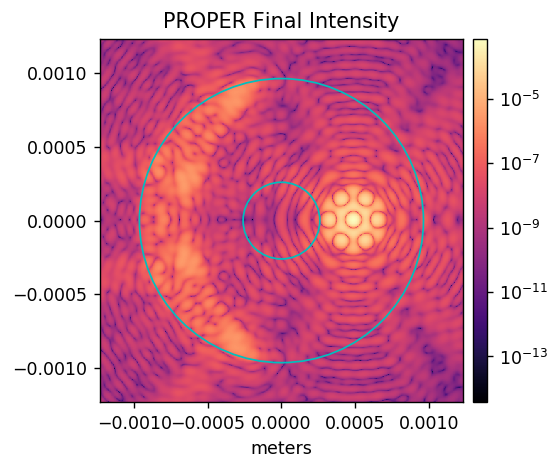

spc825-fresnel-wavefronts/wf_psf_offax_proper.fits


In [9]:
nlam = 1
lam_array = np.array([0.825])
n = 512                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

xoffset = 10
use_fpm = 1

use_errors = 0
if use_errors==0:
    use_dm1 = 0
    use_dm2 = 0
    polaxis = 0
else:
    use_dm1 = 1
    use_dm2 = 1
    polaxis = 10

dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-wide_with_aberrations_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-wide_with_aberrations_dm2.fits' )

start = time.time()
(wfs, wfs_sampling_m) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'spc-wide',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':xoffset,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'polaxis':polaxis,
                                                           'data_dir':'/groups/douglase/phaseb_data'} )
print('PROPER calculation completed in {:.4f}s'.format(time.time()-start))

psf_wf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 5.4/final_sampling*psf_sampling_m.value # inner and outer working angles in units of m
outwa = 20/final_sampling*psf_sampling_m.value
patches = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
           Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
misc.myimshow(np.abs(psf_wf)**2,
              'PROPER Final Intensity',
              lognorm=True,
              pxscl=psf_sampling_m,
              patches=patches)

wf = np.zeros(shape=(2,n,n))
wf[0,:,:] = np.abs(wfs[0])**2
wf[1,:,:] = np.angle(wfs[0])

wf_fpath = 'spc825-fresnel-wavefronts/wf_'
if use_errors==1: wf_fpath += 'ab_'
wf_fpath += 'psf_'
if use_fpm==0: wf_fpath += 'nofpm_'
if xoffset!=0: wf_fpath += 'offax_'
if lam_array[0]==0.800: wf_fpath += '800nm_'
wf_fpath += 'proper.fits'
print(wf_fpath)

hdr = fits.Header()
hdr['PIXELSCL'] = psf_sampling_m.value
hdr['PIXSCLLD'] = final_sampling

wf_hdu = fits.PrimaryHDU(wf, header=hdr)
wf_hdu.writeto(wf_fpath, overwrite=True)

Lambda = 5.7500E-07   Throughput = 1.00
Applying lens
Propagating to secondary
Applying lens
Propagating to FOLD_1
Propagating to M3
Applying lens
Propagating to M4
Applying lens
Propagating to M5
Applying lens
Propagating to FOLD_2
Propagating to FSM
Propagating to OAP1
Applying lens
Propagating to FOCM
Propagating to OAP2
Applying lens
Propagating to DM1
Propagating to DM2
Propagating to OAP3
Applying lens
Propagating to FOLD_3
Propagating to OAP4
Applying lens
Propagating to PUPIL_MASK
Propagating to OAP5
Applying lens
Propagating to FPM
Propagating to OAP6
Applying lens
Propagating to LYOT_STOP
Propagating to OAP7
Applying lens
Propagating to FIELD_STOP
Propagating to OAP8
Applying lens
Propagating to filter
Propagating to LENS
Applying lens
Propagating to FOLD_4
Propagating to IMAGE
Total elapsed time (seconds) =  14.3040
PROPER calculation completed in 14.4618s


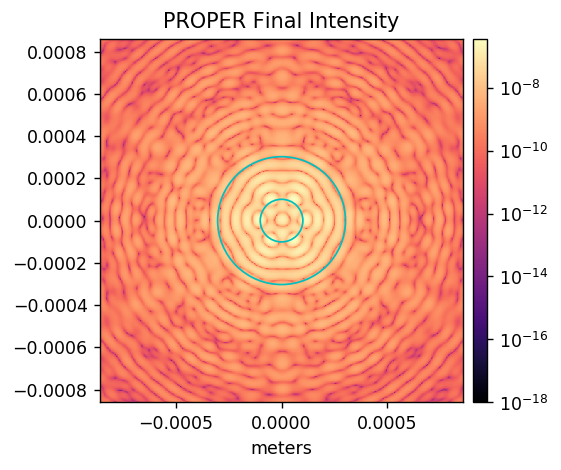

hlc575-fresnel-wavefronts/wf_psf_proper.fits


In [2]:
nlam = 1
lam_array = np.array([0.575])
n = 512                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

xoffset = 0
use_fpm = 1

use_errors = 0
if use_errors==0:
    use_dm1 = 0
    use_dm2 = 0
    polaxis = 0
else:
    use_dm1 = 1
    use_dm2 = 1
    polaxis = 10

use_fieldstop = 0

dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-wide_with_aberrations_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-wide_with_aberrations_dm2.fits' )

start = time.time()
(wfs, wfs_sampling_m) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'hlc',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':xoffset,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'use_field_stop':use_fieldstop,
                                                           'polaxis':polaxis,
                                                           'data_dir':'/groups/douglase/phaseb_data'} )
print('PROPER calculation completed in {:.4f}s'.format(time.time()-start))

psf_wf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 3/final_sampling*psf_sampling_m.value # inner and outer working angles in units of m
outwa = 9/final_sampling*psf_sampling_m.value
patches = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
           Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
misc.myimshow(np.abs(psf_wf)**2,
              'PROPER Final Intensity',
              lognorm=True, vmin=1e-18,
              pxscl=psf_sampling_m,
              patches=patches)

wf = np.zeros(shape=(2,n,n))
wf[0,:,:] = np.abs(wfs[0])**2
wf[1,:,:] = np.angle(wfs[0])

wf_fpath = 'hlc575-fresnel-wavefronts/wf_'
if use_errors==1: wf_fpath += 'ab_'
wf_fpath += 'psf_'
if use_fpm==0: wf_fpath += 'nofpm_'
if xoffset!=0: wf_fpath += 'offax_'
if lam_array[0]==0.600: wf_fpath += '600nm_'
wf_fpath += 'proper.fits'
print(wf_fpath)

hdr = fits.Header()
hdr['PIXELSCL'] = psf_sampling_m.value
hdr['PIXSCLLD'] = final_sampling

wf_hdu = fits.PrimaryHDU(wf, header=hdr)
wf_hdu.writeto(wf_fpath, overwrite=True)